In [169]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from openpyxl import load_workbook
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
from subprocess import check_call
import random as rd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

class Sweet(object):

    def __init__(self, file, cluster = 4):
        wb = pd.read_excel(file)
        data = pd.DataFrame(wb.values)
        data.columns = ['M01','M02','M03','M04','M05','M06','M07','M08','M09','M010','M011','M012','M013','M014','M015','M016','M017','M018','M019','M020','M021','M022','M023','M024','M025','M026','M027','M028','M029','M030','M031','M032','M033','M034','M035','M036','M037','M038','M039','M040','M041','M042','M043','M044','M045','M046']
#         # data.columns = ["Lantai", "Dinding", "Ventilasi", "Pagar", "Ruang Pelayanan", "Luas Area", "Penyuluhan Program Bank Sampah", "Tersedia Wdah Sesuai Pemilahan", "Jumlah Pengurus", "Pendidikan ketua", "Sistem Gaji", "Pengelola mengikuti Pelatihan", "Rekapitulasi Hasil Perolehan", "Pengumpulan Sampah Nasabah Terjadwal", "Jadwal Pengumpulan Sampah", "Pengumpulan Rutin", "Aktivitas Penjualan Sampah Nasabah", "Bank Sampah Memiliki Kerjasama", "Jumlah Pengempul Sampah yang Bekerjasama", "Kerjasama Dengan Industri Daur Ulang Sampah", "Dijual Semua ke pengepul atau industri daur ulang", "Dimanfaatkan untuk pembuatan produk adur ulang", "Proses Monitoring dan evaluasi", "Proses Monitoring", "Monitoring dan Evaluasi terhadap pengurangan atau peningkatan jumlah nasabah", "Monitoring dan evaluasi terhadap jumlah simpan uang nasabah yang tersimpan", "Hasil Monitoring dan Evaluasi Pengelolaan Bank Sampah Tercatat dengan baik", "Hasil Monitoring dan evaluasi pengelolan bank sampah dilaporkan kepada  pemerintah kota melalui Dinas Lingkungan Hidup", "Tidak lanjut berdasarkan hasil monitoring dan evaluasi", "Jumlah Nasabah", "Nasabah Awal yang Ktif", "Modal Awal", "Kondisi Rata-Rata Berat Sampah Per Bulan", "Rata-Rata Berat Sampah Per Bulan", "Rata-Rata Hasil Tabungan Nasabah", "Rata-Rata Jumlah Penambahan Nasabah", "Rata-Rata Waktu Maksimal Nasabah Baru Bertahan", "Ketentuan Aturan Hukum Sesuai Bentuk Bank Sampah", "Ketetapan Harga Beli Sampah", "Aktivitas Simpan-Pinjam", "Penetapan Jam Kerja", "Sistem Bagi Hasil Penjualan", "Ketentuan Jelas Mengenai Kondisi Sampah", "Ketentuan Jelas Mengenai Berat Minimum Sampah", "Ketentuan Jelas Mengenai Jenis Sampah ", "Tersedia Jasa Penjemputan Sampah"]
        self.dataset = data
        self.cluster = cluster
        
    def get_data(self):
        return self.dataset
    
    def transform(self): 
        d = self.dataset.fillna(0)
        new_df = list()
        for i, row in d.iterrows():
            v1 = 0
            v2 = 0
            v3 = 0
            v4 = 0
            offset = 0
            vals = 0
            for x in range(1,6):
                vals += row["M0"+ str(x + offset)]

            v1 = vals

            offset = 6
            vals = 0
            for x in range(1,6):
                vals += row["M0"+ str(x + offset)]

            v2 = vals

            offset = 12
            vals = 0
            for x in range(1,17):
                vals += row["M0"+ str(x + offset)]

            v3 = vals 

            offset = 29
            vals = 0
            for x in range(1,17):
                vals += row["M0"+ str(x + offset)]

            v4 = vals
            new_df.append([v1*(10+ rd.random())/2,v2*(10+ rd.random())/2,v3 ,v4] )

        X = pd.DataFrame(new_df).to_numpy()
        self.X = X
        return X
    def get_cluster(self): 
        # membuat model
        model = AgglomerativeClustering(n_clusters=self.cluster, affinity='euclidean', linkage = 'ward')
        model.fit(self.X)
        self.labels = model.labels_
        return model 
    def plot(self):
        label = range(1, 11)
        plt.figure(figsize=(20, 10))
        plt.subplots_adjust(bottom=0.1)
        scatter = list()
        legends = list()
        for i in range(1, self.cluster):
            scatter.append(plt.scatter(self.X[self.labels==i,0], self.X[self.labels==i,1], s=30, label=str(i)))
            legends.append("Cluster {}".format(i))
        plt.legend(scatter, legends, scatterpoints=1, loc='lower left', ncol=3, fontsize=20)
        plt.savefig("plot.png")
        return plt.show()
 

### Initialize Dataset

In [170]:
dataset = Sweet(file = "dataset.xlsx", cluster=5)
dataset.get_data()

,M01,M02,M03,M04,M05,M06,M07,M08,M09,M010,...,M037,M038,M039,M040,M041,M042,M043,M044,M045,M046
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,3.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
2,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,...,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
122,2.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
123,2.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
124,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,...,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


### Transform Dataset

In [171]:
X = dataset.transform()
X

array([[27.04400525, 49.4329226 , 20.        , 26.        ],
       [43.32765851, 45.64628046, 24.        , 26.        ],
       [35.25274743, 52.3102298 , 18.        , 26.        ],
       [42.15128252, 52.1882175 ,  8.        , 26.        ],
       [26.14447642, 45.05722966, 24.        , 27.        ],
       [25.94711341, 50.50634589, 24.        , 28.        ],
       [32.59168455, 71.42935673, 27.        , 28.        ],
       [42.15246559, 42.8639233 , 16.        , 25.        ],
       [45.71722837, 53.70941185, 16.        , 28.        ],
       [52.84054643, 54.2490482 , 18.        , 27.        ],
       [25.5880063 , 52.3685972 , 30.        , 29.        ],
       [45.59095168, 47.69871025, 18.        , 22.        ],
       [26.29957717, 59.31134901, 29.        , 26.        ],
       [35.16407242, 50.37456202, 16.        , 25.        ],
       [38.39948409, 54.165886  , 25.        , 25.        ],
       [37.30026121, 54.6653284 , 25.        , 25.        ],
       [35.69773586, 47.

### Clusterizing Data

#### Untuk menentukan dendrogram pada jarak terkecil pada data bank sampah

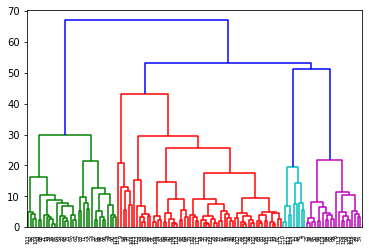

In [172]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.savefig("dendrogram.png")

#### Modelling Cluster

In [173]:
cluster = dataset.get_cluster()
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

### Visualization Data

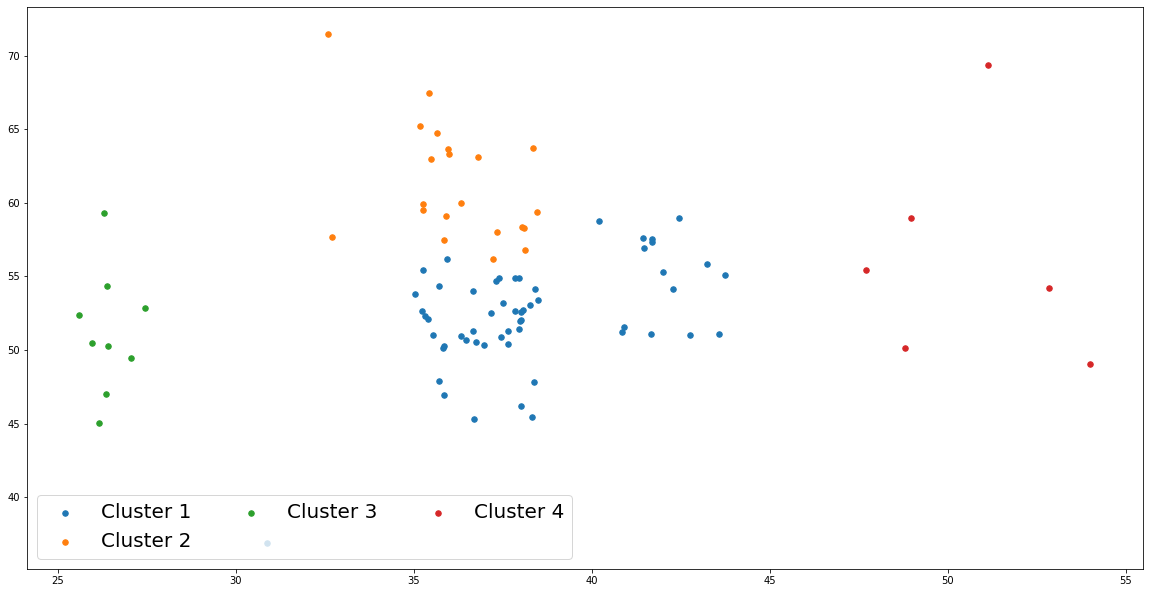

In [174]:
dataset.plot()

### Pengujian

In [176]:
dataset.labels

array([3, 0, 0, 0, 3, 3, 2, 0, 0, 4, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0,
       1, 1, 1, 0, 3, 0, 2, 1, 0, 1, 0, 0, 1, 0, 4, 4, 0, 1, 1, 1, 0, 2,
       2, 0, 0, 1, 4, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 1, 1, 1, 2,
       4, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1])

In [177]:
dataset.X

array([[27.04400525, 49.4329226 , 20.        , 26.        ],
       [43.32765851, 45.64628046, 24.        , 26.        ],
       [35.25274743, 52.3102298 , 18.        , 26.        ],
       [42.15128252, 52.1882175 ,  8.        , 26.        ],
       [26.14447642, 45.05722966, 24.        , 27.        ],
       [25.94711341, 50.50634589, 24.        , 28.        ],
       [32.59168455, 71.42935673, 27.        , 28.        ],
       [42.15246559, 42.8639233 , 16.        , 25.        ],
       [45.71722837, 53.70941185, 16.        , 28.        ],
       [52.84054643, 54.2490482 , 18.        , 27.        ],
       [25.5880063 , 52.3685972 , 30.        , 29.        ],
       [45.59095168, 47.69871025, 18.        , 22.        ],
       [26.29957717, 59.31134901, 29.        , 26.        ],
       [35.16407242, 50.37456202, 16.        , 25.        ],
       [38.39948409, 54.165886  , 25.        , 25.        ],
       [37.30026121, 54.6653284 , 25.        , 25.        ],
       [35.69773586, 47.

In [178]:
from sklearn import metrics

In [179]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dataset.X, dataset.labels, metric='euclidean'))

Silhouette Coefficient: 0.322
